In [11]:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
import matplotlib 
from matplotlib import pyplot as plt
import rebound

In [2]:
params = {'x_learning_rate': 0.1,
 'x_max_depth': 15,
 'x_min_child': 10,
 'x_pos_weight': 10,
 'x_subsample': 0.95,
 'x_tree_colsample': 0.9}

In [12]:
dataset = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 
y = dataset['Stable']
X = dataset[features]
X.head(5)
#X.shape

#bst = xgb.train(params, d_Train)

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.396282,0.481704,0.000329,0.001083,0.000214,0.000456,0.000701,0.001978,0.000446,0.000964,...,2.144832e-10,2.681898e-11,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,16.019985
1,1.034575,0.823935,0.000739,0.002137,0.000202,0.000463,0.000200,0.000350,0.000226,0.000377,...,3.559377e-11,-9.314702e-11,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,15.368196
2,0.440470,0.491261,0.001951,0.003550,0.001735,0.002860,0.002303,0.004034,0.002080,0.003409,...,-3.330088e-11,-4.095504e-11,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,25.351948
3,0.432098,0.550624,0.000026,0.000120,0.000005,0.000009,0.000019,0.000050,0.000016,0.000041,...,7.816527e-13,-7.257099e-12,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,19.156777
4,5.722053,17.442426,0.028284,0.063028,0.004313,0.010716,0.038832,0.160685,0.090892,0.112168,...,3.913858e-08,-2.610208e-08,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,4.156005


In [4]:
#stable percentage
len(np.where(y==1)[0]) / float(X.shape[0])

0.39633585343413735

In [5]:
# try 10 percentage increments
# try with stratified k fold?
from sklearn import metrics

Iteration: 1
Data size 2597
Percent Stable 0.4046977281478629
Average test score: 0.9658060709739713
Iteration: 2
Data size 5141
Percent Stable 0.3977825325812099
Average test score: 0.970517957665709
Iteration: 3
Data size 7654
Percent Stable 0.3918212699242226
Average test score: 0.9717807015485382
Iteration: 4
Data size 10106
Percent Stable 0.3901642588561251
Average test score: 0.9736643262520017
Iteration: 5
Data size 12596
Percent Stable 0.3929818990155605
Average test score: 0.9764049987659943
Iteration: 6
Data size 15153
Percent Stable 0.3951032798785719
Average test score: 0.9775619971224941
Iteration: 7
Data size 17542
Percent Stable 0.39499486945616236
Average test score: 0.9761968212503155
Iteration: 8
Data size 19989
Percent Stable 0.39681825003752064
Average test score: 0.9756235171430936
Iteration: 9
Data size 22457
Percent Stable 0.3973816627332235
Average test score: 0.9791324216996984
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


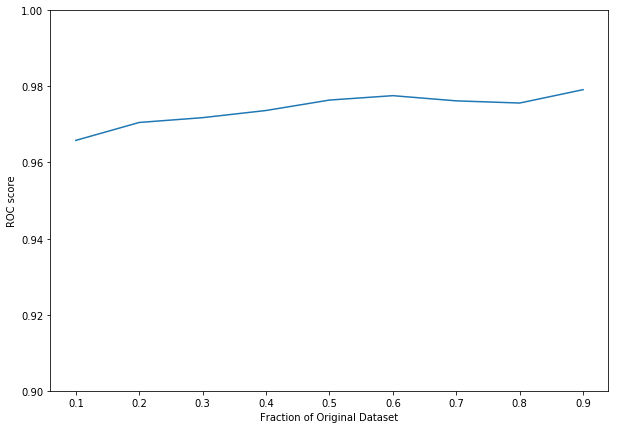

In [6]:
def data_set_size(order_of_mag, yrange= None):
    # use the first i splits for training, and remaining for testing
    np.random.seed(0)
    indices = np.random.random(size = X.shape[0])
    #print(indices[:10])
    hold_outscore = np.zeros(9)
    for i in range(1, 10):
        thresh =i*order_of_mag
        slices = indices<thresh
        train_data = X.loc[slices]
        test_data = X.loc[~slices]
        train_y = y[slices]
        test_y = y[~slices]

        # run cv on train data
        train_data = xgb.DMatrix(train_data, label=train_y)    
        test_data = xgb.DMatrix(test_data)
        #vals = xgb.cv(params= params, dtrain=train_data, num_boost_round=10, nfold=5, stratified=True, metrics = "auc")
        bst = xgb.train(params, dtrain=train_data)
        preds = bst.predict(test_data)
        print("Iteration: {}".format(i))
        print("Data size", train_data.num_row())
        print("Percent Stable", len(np.where(train_y==1)[0])/train_data.num_row())
        print("Average test score: {}".format(metrics.roc_auc_score(test_y ,preds)))
        hold_outscore[i-1]= metrics.roc_auc_score(test_y ,preds)

    data_inc = np.arange(1, 10)*order_of_mag
    print(data_inc)
    plt.figure(figsize=(10, 7))
    #plt.plot(data_inc, hold_outscore, label = "Holdout score")
    plt.plot(data_inc, hold_outscore, label = "Holdout Score")
    plt.xlabel("Fraction of Original Dataset")
    plt.ylabel("ROC score") # not area under precision recall curve, thats slightly different, and isnt supported by xgb cv
    if yrange ==None:
        plt.ylim([0.9,1])
    else:
        plt.ylim(yrange)
    plt.show() 
data_set_size(0.1)
# two percentage increase from 0.1 to 0.9 of the original dataset size
# looks significant only because of how zoomed in the scale is 
# is it worth it given the computation time for 0.8*25,000 = 20,000 systems?

Iteration: 1
Data size 275
Percent Stable 0.41818181818181815
Average test score: 0.9448367148674912
Iteration: 2
Data size 548
Percent Stable 0.4032846715328467
Average test score: 0.9462436802394492
Iteration: 3
Data size 815
Percent Stable 0.40613496932515336
Average test score: 0.9573346047782163
Iteration: 4
Data size 1088
Percent Stable 0.40625
Average test score: 0.9585927906379261
Iteration: 5
Data size 1333
Percent Stable 0.4051012753188297
Average test score: 0.9601933354607949
Iteration: 6
Data size 1598
Percent Stable 0.40550688360450565
Average test score: 0.9613295736567368
Iteration: 7
Data size 1869
Percent Stable 0.40770465489566615
Average test score: 0.9651355829298025
Iteration: 8
Data size 2105
Percent Stable 0.4085510688836104
Average test score: 0.9648377957711662
Iteration: 9
Data size 2329
Percent Stable 0.4027479604980678
Average test score: 0.966526308294477
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


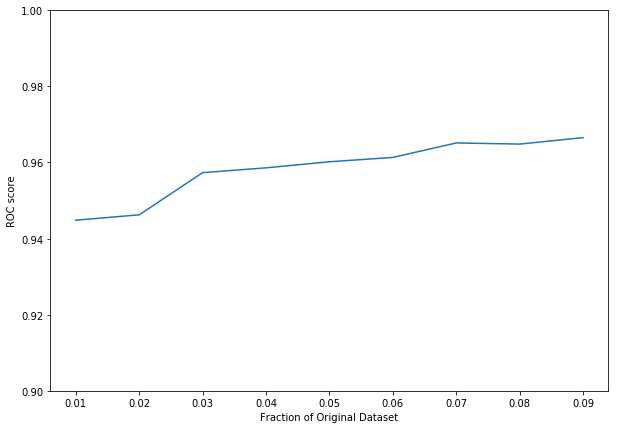

In [127]:
data_set_size(0.01)

Iteration: 1
Data size 30
Percent Stable 0.43333333333333335
Average test score: 0.9225768774332963
Iteration: 2
Data size 69
Percent Stable 0.391304347826087
Average test score: 0.9286015377799455
Iteration: 3
Data size 104
Percent Stable 0.41346153846153844
Average test score: 0.9216335937687051
Iteration: 4
Data size 121
Percent Stable 0.39669421487603307
Average test score: 0.9358863278872656
Iteration: 5
Data size 141
Percent Stable 0.3971631205673759
Average test score: 0.936983566973806
Iteration: 6
Data size 175
Percent Stable 0.4
Average test score: 0.9312456449493134
Iteration: 7
Data size 200
Percent Stable 0.41
Average test score: 0.9414443963718448
Iteration: 8
Data size 227
Percent Stable 0.42290748898678415
Average test score: 0.9432268151951883
Iteration: 9
Data size 249
Percent Stable 0.42168674698795183
Average test score: 0.9482111778800244
[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]


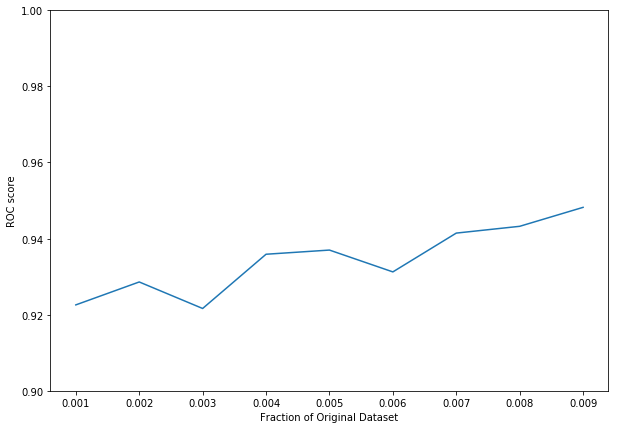

In [129]:
data_set_size(0.001)

Iteration: 1
Data size 2597
Average test score: 0.95602234
Iteration: 2
Data size 5141
Average test score: 0.9637638
Iteration: 3
Data size 7654
Average test score: 0.9682770000000002
Iteration: 4
Data size 10106
Average test score: 0.9695618399999999
Iteration: 5
Data size 12596
Average test score: 0.9690592
Iteration: 6
Data size 15153
Average test score: 0.9704266399999998
Iteration: 7
Data size 17542
Average test score: 0.9707376200000001
Iteration: 8
Data size 19989
Average test score: 0.9716597800000002
Iteration: 9
Data size 22457
Average test score: 0.9728320400000001
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


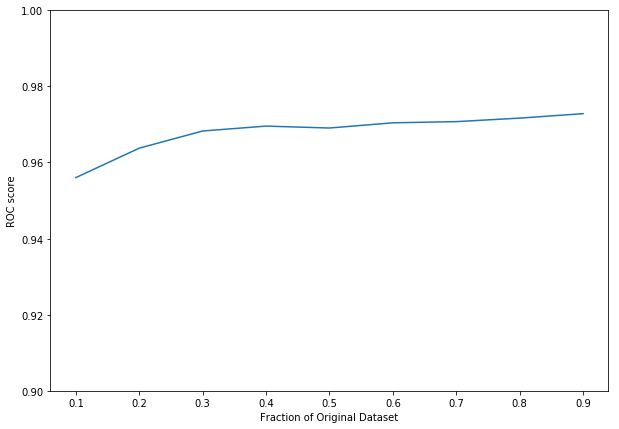

In [120]:
def data_set_size_cv(order_of_mag, yrange= None):
    # use the first i splits for training, and remaining for testing
    np.random.seed(0)
    indices = np.random.random(size = X.shape[0])
    #print(indices[:10])
    cv_outscore = np.zeros(9)
    for i in range(1, 10):
        thresh =i*order_of_mag
        slices = indices<thresh
        train_data = X.loc[slices]
        test_data = X.loc[~slices]
        train_y = y[slices]
        test_y = y[~slices]

        # run cv on train data
        train_data = xgb.DMatrix(train_data, label=train_y)    
        test_data = xgb.DMatrix(test_data)
        vals = xgb.cv(params= params, dtrain=train_data, num_boost_round=10, nfold=5, stratified=True, metrics = "auc")
        #bst = xgb.train(params, dtrain=train_data)
        preds = bst.predict(test_data)
        print("Iteration: {}".format(i))
        print("Data size", train_data.num_row())
        #print("Percent Stable", len(np.where(train_y==1)[0])/train_data.num_row())
        print("Average test score: {}".format(vals["test-auc-mean"].mean()))
        cv_outscore[i-1]= vals["test-auc-mean"].mean()

    data_inc = np.arange(1, 10)*order_of_mag
    print(data_inc)
    plt.figure(figsize=(10, 7))
    #plt.plot(data_inc, hold_outscore, label = "Holdout score")
    plt.plot(data_inc, cv_outscore, label = "Holdout Score")
    plt.xlabel("Fraction of Original Dataset")
    plt.ylabel("ROC score") # not area under precision recall curve, thats slightly different, and isnt supported by xgb cv
    if yrange ==None:
        plt.ylim([0.9,1])
    else:
        plt.ylim(yrange)
    plt.show() 
data_set_size_cv(0.1)

Iteration: 1
Data size 275
Average test score: 0.9266576599999998
Iteration: 2
Data size 548
Average test score: 0.92654056
Iteration: 3
Data size 815
Average test score: 0.95048308
Iteration: 4
Data size 1088
Average test score: 0.9500921199999999
Iteration: 5
Data size 1333
Average test score: 0.9460718
Iteration: 6
Data size 1598
Average test score: 0.9502812399999998
Iteration: 7
Data size 1869
Average test score: 0.9499730599999999
Iteration: 8
Data size 2105
Average test score: 0.9566090199999999
Iteration: 9
Data size 2329
Average test score: 0.9531215799999998
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


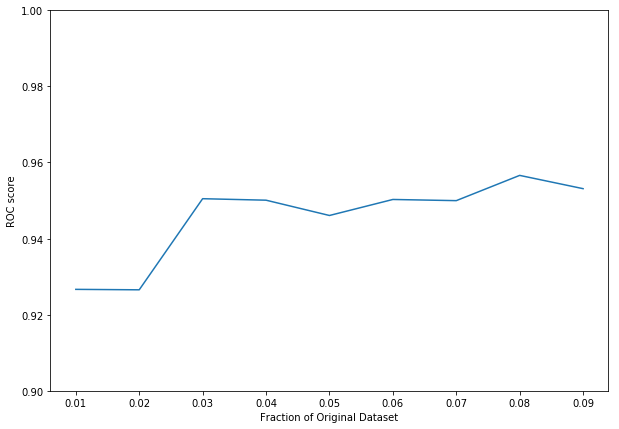

Iteration: 1
Data size 30
Average test score: 0.9383332799999999
Iteration: 2
Data size 69
Average test score: 0.85501854
Iteration: 3
Data size 104
Average test score: 0.8960220400000001
Iteration: 4
Data size 121
Average test score: 0.9090952799999998
Iteration: 5
Data size 141
Average test score: 0.8988814599999999
Iteration: 6
Data size 175
Average test score: 0.9313945400000001
Iteration: 7
Data size 200
Average test score: 0.9120779999999999
Iteration: 8
Data size 227
Average test score: 0.91028044
Iteration: 9
Data size 249
Average test score: 0.9271956400000001
[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]


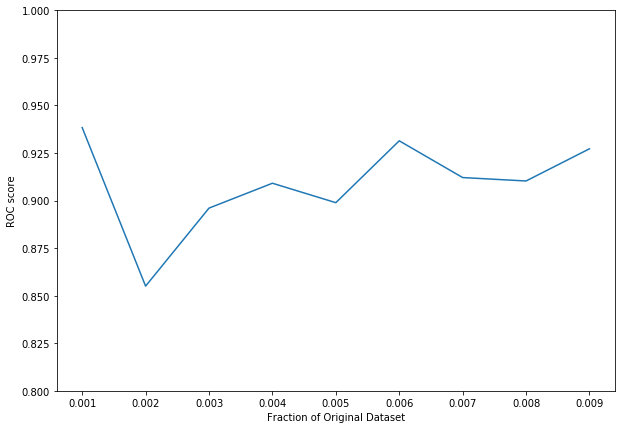

In [122]:
data_set_size_cv(0.01)
data_set_size_cv(0.001, [0.8, 1])

Data size 30
Percent Stable 0.43333333333333335
Average test score: 0.9225768774332963


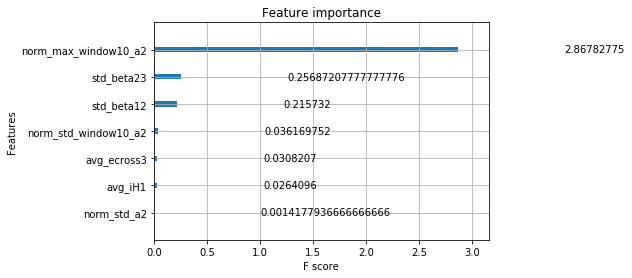

In [32]:
thresh =0.001
np.random.seed(0)
indices = np.random.random(size = X.shape[0])
slices = indices<thresh
train_data = X.loc[slices]
test_data = X.loc[~slices]
train_y = y[slices]
test_y = y[~slices]

# run cv on train data
train_data = xgb.DMatrix(train_data, label=train_y)    
test_data = xgb.DMatrix(test_data)
#vals = xgb.cv(params= params, dtrain=train_data, num_boost_round=10, nfold=5, stratified=True, metrics = "auc")
bst = xgb.train(params, dtrain=train_data)
preds = bst.predict(test_data)
print("Data size", train_data.num_row())
print("Percent Stable", len(np.where(train_y==1)[0])/train_data.num_row())
print("Average test score: {}".format(metrics.roc_auc_score(test_y ,preds)))

xgb.plot_importance(bst, importance_type="gain")
plt.show()
#plot feature importances
